In [1]:
import pandas as pd
import os

In [3]:
#Change Directory to Dataset File
os.chdir('C:/Users/saram/Documents/MS Data Analytics Engineering/CS 504 - Data Management and Mining/Project Folder')

In [4]:
#Read Census Data
census_data = pd.read_csv('CLEANED - Census Data 2')

#Inspect Data
census_data.head(10)

,Unnamed: 0,NAME,Estimate!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Median age (years),Percent Estimate!!RACE!!Total population!!One race!!White,Percent Estimate!!RACE!!Total population!!One race!!Black or African American,Percent Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native,Percent Estimate!!RACE!!Total population!!One race!!Asian,Percent Estimate!!RACE!!Total population!!One race!!Native Hawaiian and Other Pacific Islander!!Other Pacific Islander,Percent Estimate!!RACE!!Total population!!Two or more races,Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race),Estimate!!Households!!Total,Estimate!!Households!!Median income (dollars)
0,0,Dutchess,295685,41.8,78.6,10.5,0.4,3.7,0.0,3.0,11.7,107384,75585
1,1,Jefferson,116567,31.9,86.1,5.8,0.6,1.5,0.2,4.1,7.3,43206,50322
2,2,Schoharie,31611,44.1,96.0,1.6,0.2,0.9,0.0,1.1,3.0,12539,51842
3,3,Monroe,748680,38.6,75.9,15.3,0.4,3.7,0.0,2.9,8.3,300496,55272
4,4,Fulton,53955,43.4,94.7,1.8,0.3,0.7,0.0,1.5,2.8,22535,48033
5,5,Otsego,60750,42.0,93.5,2.0,0.2,1.4,0.0,1.9,3.5,23627,51254
6,6,New York,1653877,37.1,56.4,14.9,0.4,12.0,0.0,4.4,26.1,758345,79781
7,7,Tioga,49322,44.0,96.7,0.6,0.0,0.8,0.0,1.6,1.8,19996,57153
8,8,Cayuga,78319,42.5,92.0,4.1,0.3,0.5,0.0,2.5,2.8,31428,54664
9,9,Orleans,41584,42.8,89.2,6.0,0.4,0.7,0.1,2.0,4.7,16214,49223


In [5]:
# Read Health Data
health_data = pd.read_csv('Datasets/Healthcare_Data.csv')
health_data.head(10)

# Create dataframe for DRG Code of Interest
heart_df=health_data[(health_data['APR DRG Description']=='Heart Failure') & (health_data['Year'] == 2016) & (health_data['APR Severity of Illness Code'] == 1)]
heart_df.head(10)

,Year,Facility Id,Facility Name,APR DRG Code,APR Severity of Illness Code,APR DRG Description,APR Severity of Illness Description,APR Medical Surgical Code,APR Medical Surgical Description,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost,Description,Type of Facility,Latitude,Longitude,County
708,2016,1,Albany Medical Center Hospital,194,1,Heart Failure,Minor,M,Medical,25,21788.97,19675.17,5168.81,4828.80,Description,Not for Profit Corporation,42.653370,-73.773834,Albany
1601,2016,4,Albany Memorial Hospital,194,1,Heart Failure,Minor,M,Medical,2,8375.41,8375.41,3585.05,3585.05,Hospital,Not for Profit Corporation,42.674271,-73.749268,Albany
1988,2016,325,Alice Hyde Medical Center,194,1,Heart Failure,Minor,M,Medical,5,7118.75,7537.55,3487.82,2790.89,Hospital,Not for Profit Corporation,44.856770,-74.291893,Franklin
2481,2016,116,Arnot Ogden Medical Center,194,1,Heart Failure,Minor,M,Medical,23,10192.59,10549.82,3704.76,3299.31,Hospital,Not for Profit Corporation,42.099285,-76.826782,Chemung
3148,2016,85,Auburn Community Hospital,194,1,Heart Failure,Minor,M,Medical,11,8655.16,8422.25,2711.71,2662.38,Residential Health Care Facility - SNF,Not for Profit Corporation,42.940811,-76.564758,Cayuga
3608,2016,739,Aurelia Osborn Fox Memorial Hospital,194,1,Heart Failure,Minor,M,Medical,16,6643.50,6110.55,2334.85,2192.50,Diagnostic and Treatment Center,Not for Profit Corporation,42.457405,-75.053261,Otsego
4128,2016,1438,Bellevue Hospital Center,194,1,Heart Failure,Minor,M,Medical,45,21221.63,21201.80,11030.18,11019.87,Hospital,Municipality,40.739605,-73.976509,New York
4909,2016,280,Bertrand Chaffee Hospital,194,1,Heart Failure,Minor,M,Medical,2,7742.83,7742.83,3053.03,3053.03,Residential Health Care Facility - SNF,Not for Profit Corporation,42.508575,-78.659103,Erie
5165,2016,708,Bon Secours Community Hospital,194,1,Heart Failure,Minor,M,Medical,5,30945.15,25843.10,10174.42,9185.72,Hospital,Not for Profit Corporation,41.367916,-74.682487,Orange
5680,2016,1178,Bronx-Lebanon Hospital Center - Concourse Divi...,194,1,Heart Failure,Minor,M,Medical,42,11232.48,9998.58,12214.48,11268.73,Hospital,Not for Profit Corporation,40.843609,-73.911545,Bronx


In [6]:
# Build Weighted Average Dataframe for correlation testing
heart_df['weight'] = (heart_df['Mean Charge'])*(heart_df['Discharges'])

C:\Users\saram\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
heart_df_w = heart_df.groupby(['County'],  as_index = False)['weight', 'Discharges'].sum()

heart_df_w['weighted avg'] = (heart_df_w['weight']/heart_df_w['Discharges']).round(2)

fac_count = heart_df.groupby(['County'],  as_index = False)['Facility Id'].count()

hrt_corr_df = heart_df_w.set_index('County').join(fac_count.set_index('County'))

hrt_corr_df.head(6)

,weight,Discharges,weighted avg,Facility Id
County,,,,
Albany,724909.44,38,19076.56,3
Allegany,30191.30,5,6038.26,1
Bronx,8529149.84,318,26821.23,9
Broome,173743.50,21,8273.50,3
Cattaraugus,53069.04,8,6633.63,1
Cayuga,95206.76,11,8655.16,1


In [24]:
# Join number of facilities per county with weighted averages
fac_info  = pd.read_csv('Health_Facility_General_Information.csv')
fac_count = fac_info.groupby(['Facility County'], as_index=False)['Facility ID'].count()
hrt_corr_df = hrt_corr_df.join(fac_count.set_index('Facility County'))
hrt_corr_df = hrt_corr_df.drop(columns=['Facility Id', 'weight'])

hrt_corr_df.head(5)


,Discharges,weighted avg,Facility ID
County,,,
Albany,38,19076.56,117
Allegany,5,6038.26,18
Bronx,318,26821.23,332
Broome,21,8273.50,68
Cattaraugus,8,6633.63,29


In [25]:
# test correlation between County Facility Count and Mean Charge
hrt_corr_df['weighted avg'].corr(hrt_corr_df['Facility ID'])

0.6791618623395086

Text(0.5, 1.0, 'Facility Count per County vs Weighted Mean Charge')

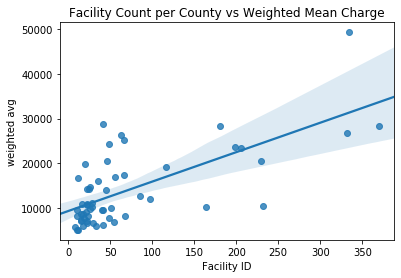

In [12]:
# Create Regression plot for Facilty Count vs Mean Charge
import matplotlib as plt
import seaborn as sns

sns.regplot(x='Facility ID', y='weighted avg', data=hrt_corr_df).set_title('Facility Count per County vs Weighted Mean Charge')


In [26]:
hrt_corr_df['Facility ID'].corr(hrt_corr_df['weighted avg'])

0.6791618623395086

In [27]:
# Join Census and Weighted Avg Data
hrt_corr_df = hrt_corr_df.join(census_data.set_index('NAME'))
hrt_corr_df.head(5)

,Discharges,weighted avg,Facility ID,Unnamed: 0,Estimate!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Median age (years),Percent Estimate!!RACE!!Total population!!One race!!White,Percent Estimate!!RACE!!Total population!!One race!!Black or African American,Percent Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native,Percent Estimate!!RACE!!Total population!!One race!!Asian,Percent Estimate!!RACE!!Total population!!One race!!Native Hawaiian and Other Pacific Islander!!Other Pacific Islander,Percent Estimate!!RACE!!Total population!!Two or more races,Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race),Estimate!!Households!!Total,Estimate!!Households!!Median income (dollars)
County,,,,,,,,,,,,,,,
Albany,38,19076.56,117,10.0,308580.0,37.8,76.0,12.3,0.2,6.4,0.0,3.7,5.7,125376.0,62293.0
Allegany,5,6038.26,18,11.0,47400.0,38.6,95.5,1.4,0.3,1.2,0.0,1.1,1.5,18124.0,45359.0
Bronx,318,26821.23,332,52.0,1455846.0,33.6,21.0,33.6,0.7,3.7,0.0,3.5,55.7,495356.0,36593.0
Broome,21,8273.50,68,41.0,196124.0,39.6,86.1,5.8,0.2,4.2,0.0,2.8,4.0,78821.0,49064.0
Cattaraugus,8,6633.63,29,42.0,78175.0,41.7,92.1,1.7,3.0,0.9,0.0,2.0,2.0,31723.0,45571.0


In [28]:
# Correlation test between Mean Charge and County Median Household Income
hrt_corr_df['weighted avg'].corr(hrt_corr_df['Estimate!!Households!!Median income (dollars)'])

0.6034902851833125

Text(0.5, 1.0, 'County Median Income vs Weighted Mean Charge')

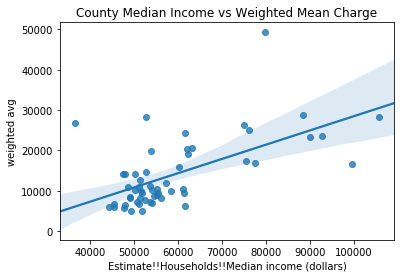

In [16]:
sns.regplot(x='Estimate!!Households!!Median income (dollars)', y='weighted avg', data=hrt_corr_df).set_title('County Median Income vs Weighted Mean Charge')

In [19]:
by_year = pd.read_csv('by_year.csv')
by_year.head(5)

,Row Labels,2009,2010,2011,2012,2013,2014,2015,2016
0,1,37251.75,42835.00,44036.45,43111.30,63790.32,49046.32,52391.19,46776.66
1,4,9765.75,13058.75,14557.14,13826.01,17152.74,16576.04,18205.38,24396.86
2,5,21185.75,24311.00,28275.32,29621.75,33193.55,31536.56,35267.98,32485.54
3,39,11099.00,8716.25,8619.61,12127.48,10273.10,12966.68,20059.10,12773.41
4,42,13335.75,14878.00,18229.82,20109.63,18263.59,20259.62,21194.60,16367.17


In [29]:
hrt_corr_df.rename(columns = {"Facility ID": "Total Facility Count"}, inplace=True)
                                

In [30]:
hrt_corr_df.head(5)

,Discharges,weighted avg,Total Facility Count,Unnamed: 0,Estimate!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Median age (years),Percent Estimate!!RACE!!Total population!!One race!!White,Percent Estimate!!RACE!!Total population!!One race!!Black or African American,Percent Estimate!!RACE!!Total population!!One race!!American Indian and Alaska Native,Percent Estimate!!RACE!!Total population!!One race!!Asian,Percent Estimate!!RACE!!Total population!!One race!!Native Hawaiian and Other Pacific Islander!!Other Pacific Islander,Percent Estimate!!RACE!!Total population!!Two or more races,Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race),Estimate!!Households!!Total,Estimate!!Households!!Median income (dollars)
County,,,,,,,,,,,,,,,
Albany,38,19076.56,117,10.0,308580.0,37.8,76.0,12.3,0.2,6.4,0.0,3.7,5.7,125376.0,62293.0
Allegany,5,6038.26,18,11.0,47400.0,38.6,95.5,1.4,0.3,1.2,0.0,1.1,1.5,18124.0,45359.0
Bronx,318,26821.23,332,52.0,1455846.0,33.6,21.0,33.6,0.7,3.7,0.0,3.5,55.7,495356.0,36593.0
Broome,21,8273.50,68,41.0,196124.0,39.6,86.1,5.8,0.2,4.2,0.0,2.8,4.0,78821.0,49064.0
Cattaraugus,8,6633.63,29,42.0,78175.0,41.7,92.1,1.7,3.0,0.9,0.0,2.0,2.0,31723.0,45571.0


In [31]:
hrt_corr_df.to_csv('Combined Census Weighted Avg.csv')

In [32]:
# Read data for all DRGs in year 2016
all_DRG = pd.read_csv('2016_County_data_by_DRG.csv')

In [33]:
all_DRG_County = all_DRG.groupby(['County'], as_index = False)['Weighted avg', 'Total Population'].mean()

Text(0.5, 1.0, 'County Population vs Weighted Mean Charge')

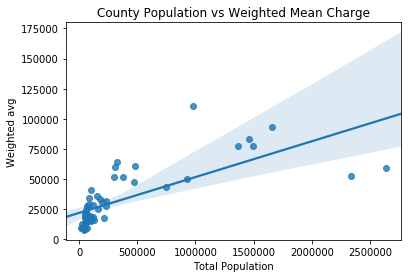

In [34]:
# Plot population vs weighted avg

sns.regplot(x='Total Population', y='Weighted avg', data=all_DRG_County).set_title('County Population vs Weighted Mean Charge')

In [35]:
all_DRG_County.corr()

,Weighted avg,Total Population
Weighted avg,1.000000,0.725122
Total Population,0.725122,1.000000


In [36]:
all_DRG_County.sort_values(by = 'Total Population')

,County,Weighted avg,Total Population
45,Schuyler,9775.223316,18112.0
55,Yates,9019.041469,25083.0
22,Lewis,12610.657294,26845.0
15,Essex,7861.535902,38233.0
54,Wyoming,8987.307174,40886.0
34,Orleans,8743.789043,41584.0
12,Delaware,8702.623581,45950.0
1,Allegany,11991.174766,47400.0
11,Cortland,13960.536381,48334.0
8,Chenango,20936.192791,48763.0
